# Group 22 Final Report

### Group Members:

Kaiser Ninomiya (41514506)

Patrick Cui (39674692)

Uday Kapoor (21201249)

Viet Ngo (71724082)

## Gender Wage Disparities in the United States: A Comparative Analysis

### Table of Contents

- [Introduction](#Introduction)
- [Methods and Results](#Methods-and-Results)
    - [Data Wrangling](#Data-Wrangling)
    - [Plotting of Relevant Variables](#Plotting-of-relevant-variables)
    - [Hypothesis Testing - Asymptotic Method](#Hypothesis-Testing---Asymptotic-Method)
    - [Hypothesis Testing - Bootstrapping Method](#Hypothesis-Testing---Bootstrapping-Method)
    - [Comparision of the two methods](#Comparision-of-the-two-methods)
- [Discussion](#Discussion)
- [References](#References)

# Introduction

The proposed project aims to investigate gender wage disparities in the United States using a dataset containing information on various demographic and employment-related variables. The primary question we seek to answer is whether there is a significant difference in wages between male and female workers, specifically whether male workers are more likely to earn more than their female counterparts. We will focus on the hourly wage as our main variable of interest to compare across the two genders. By analyzing this dataset, we aim to investigate the stereotype "men get paid higher than women" and hopefully shed light on existing gender wage gaps and assess the potential impact of such disparities.
Our project aims to investigate gender wage disparities in the United States using *Gender Pay Gap dataset* contained from Kaggle that contains information on various demographic and employment-related variables. We seek to answer whether there is a significant difference in wages between male and female workers.

For this report, we will use the mean as the parameter of interest. We understand that the distribution of wages is known to be right-skewed, so the median would be a better choice. However, we must choose a parameter that deploys a sum of random values when using the asymptotic method, hence our choice of the mean. From our question, we formally state the hypotheses as follow:

$$H_{0}: \mu_{\text{male}} = \mu_{\text{female}}$$ 
$$H_{1}: \mu_{\text{male}} > \mu_{\text{female}}$$ 

$$\text{Confidence level: 0.95}$$

Where $\mu_{\text{male}}$ and $\mu_{\text{female}}$ are the mean wage for men and women respectively. 
The null hypothesis for the test is that male workers and female workers get paid approximately the same hourly wage while the alternative hypothesis is that male workers, on average, gets paid higher hourly wage than female workers.
We choose the confidence level to be 0.95 because it is a common value used for hypothesis testing and it balanced out the possibility of committing a Type I error and a Type II error. In addition, we are not making any high-risk decisions based on the result of this test so a higher p-value is not needed.

# Methods and Results

## Data Wrangling

In [1]:
library(infer)
library(repr)
library(readr)
library(tidyverse)
library(RColorBrewer)

library(cowplot)
library(datateachr)
library(digest)
library(taxyvr)
library(broom)
library(testthat)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


The following objects are masked from ‘package:readr’:

    edition_get, local_edition




We will import and clean the dataset, ensuring that the data is in a tidy format for analysis. We will also plot the raw data, specifically examining the distribution of hourly wages for male and female workers. In the preliminary analysis, we observed that there is a clear difference in the distribution of hourly wages between males and females.

In [22]:
raw_data <- read_csv('https://github.com/AVietCong/stat201-group22-project/raw/main/Gender_Pay_Gap_dataset.csv')
raw_data$occupation <- colnames(raw_data[,106:127])[apply(raw_data[,106:127], 1, which.max)]

filtered_data <- select(raw_data, sex, hrwage) %>%
    mutate(sex = as.factor(sex),
           hrwage = as.double(hrwage))

head(filtered_data)
print("Table 1.1 - Filtered gender paygap table")

Rows: 53790 Columns: 129
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): adj_occ2name
dbl (127): year, serial, numprec, gq, region, statefip, metro, metarea, coun...
lgl   (1): farm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,hrwage
<fct>,<dbl>
1,24.91259
1,31.00000
1,21.63461
1,12.82051
1,21.25000
1,21.87500


[1] "Table 1.1 - Filtered gender paygap table"


We will narrow down the dataset to focus only on the variables of interest: sex and hourly wage(hrwage).

In [23]:
pay_data <- filtered_data %>%
    mutate(sex = fct_recode(sex, 'male' = '1', 'female' = '2'))
head(pay_data)
print("Table 1.2 - Gender paygap")

sex,hrwage
<fct>,<dbl>
male,24.91259
male,31.00000
male,21.63461
male,12.82051
male,21.25000
male,21.87500


[1] "Table 1.2 - Gender paygap table with education level"


Here we reassign the factors to they are more readable.

In [24]:
print("Count of missing values by column wise")
sapply(pay_data, function(x) sum(is.na(x)))

[1] "Count of missing values by column wise"


sex hrwage 
     0      0

In [25]:
for (x in list("male", "female")) {
    cat("mean for " , x , ": ", mean(subset(pay_data, sex==x)$hrwage), "\n")
    cat("median for ",x,": ", median(subset(pay_data, sex==x)$hrwage), "\n")
    cat("sd for ",x,": ", sd(subset(pay_data, sex==x)$hrwage), "\n", "\n")
}

mean for  male :  28.84364 
median for  male :  21.63461 
sd for  male :  221.4018 
 
mean for  female :  21.92408 
median for  female :  17.30769 
sd for  female :  23.50221 
 


## Plotting of relevant variables

### Demographics

In [26]:
sex_summary <- pay_data |>
    group_by(sex) |>
    summarise(count = n())
sex_summary
print("Table 2.1 - Sample sizes of men and women in the dataset")

sex,count
<fct>,<int>
male,27225
female,26565


[1] "Table 2.1 - Sample sizes of men and women in the dataset"


[1] "Figure 2.2 - Number of men and women in the dataset"


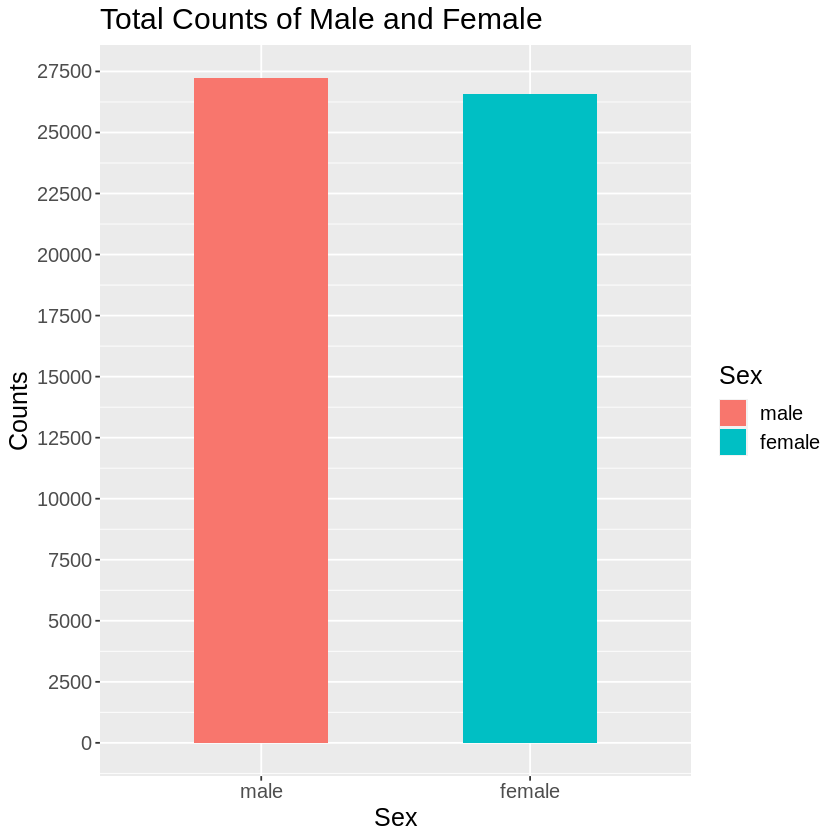

In [27]:
sex_plot <- sex_summary |>
    ggplot(aes(x = sex, y = count, fill = sex)) +
    geom_bar(stat = "identity", width = 0.5) +
    scale_y_continuous(breaks=seq(0, 27500, by = 2500)) +
    labs(x = "Sex", y = "Counts", fill = "Sex") +
    theme(text = element_text(size = 15)) +
    ggtitle("Total Counts of Male and Female")
    
sex_plot
print("Figure 2.2 - Number of men and women in the dataset")

We can see that the number of man and woman in the survey are roughly equal and that the sample size for each group is quite large.

## Hourly Wage 

In [8]:
hrwage_summary <- pay_data %>%
    group_by(sex) %>%
    summarize(mean_wage = mean(hrwage))
hrwage_summary
print("Table 2.3 - Mean wage for men and women")

sex,mean_wage
<fct>,<dbl>
male,28.84364
female,21.92408


[1] "Table 2.3 - Mean wage for men and women"


Warning message:
“Removed 1186 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


[1] "Figure 2.4 - Sample distribution of hourly wage for men and women"


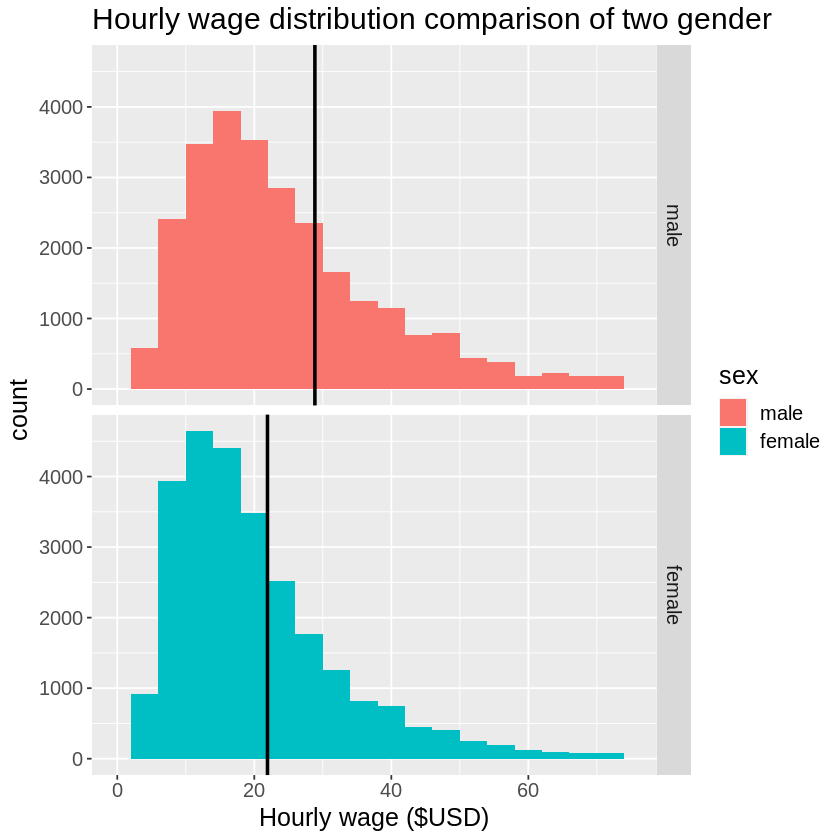

In [9]:
hrwage_plot <- pay_data %>%
  ggplot() +
  geom_histogram(aes(x = hrwage, fill = sex), binwidth = 4) +
  geom_vline(data = hrwage_summary, mapping = aes(xintercept = mean_wage), size = 1) +
  facet_grid(vars(sex)) + 
  xlim(0, 75) + xlab("Hourly wage ($USD)") + 
  ggtitle("Hourly wage distribution comparison of two gender") +
  theme(text = element_text(size = 15))
hrwage_plot
print("Figure 2.4 - Sample distribution of hourly wage for men and women")

From the table and plot above, we can see that the mean wage for men is higher than women for this sample, at around $7 more.

## Hypothesis Testing - Asymptotic Method

Originally, we inteded to use the whole dataset to perform the hypothesis test; however, we found that taking a whole dataset as a sample takes a significant amout of computer power to create each tests, so we decided to take a smaller sample from the original dataset. We set both groups to be the same size of 500 since the original sample is roughly evenly split between the two groups. The assumptions that we make to perform the t-test is that the selection of random sample is random, the size of the data is sufficient to represent the whole population and large enough to compensate for the fact that the sample distribution isn't normal. 

In [10]:
set.seed(2345)
sample <- 
    pay_data %>%
    group_by(sex) %>%
    sample_n(size = case_when(sex == "male" ~ 500,
                              sex == "female" ~ 500),
             replace = FALSE) %>%
    ungroup()
head(sample)
print("Table 3.1 - First few observations of the subsetted sample")

sex,race,hrwage,incwage,wkswork1,uhrswork,potexp,occupation,wkswork,education_level
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<chr>
male,White,24.55621,83000,52,65,30,manager,52,College
male,White,44.23077,115000,52,50,14,production,52,Highschool
male,White,19.23077,42000,52,42,22,transport,52,Associate Degree
male,Other,96.15385,250000,52,50,19,computer,52,Advanced Degree
male,White,72.11539,150000,52,40,19,scientist,52,Advanced Degree
male,White,19.11765,39000,51,40,11,manager,51,College


[1] "Table 3.1 - First few observations of the subsetted sample"


[1] "Figure 3.2"


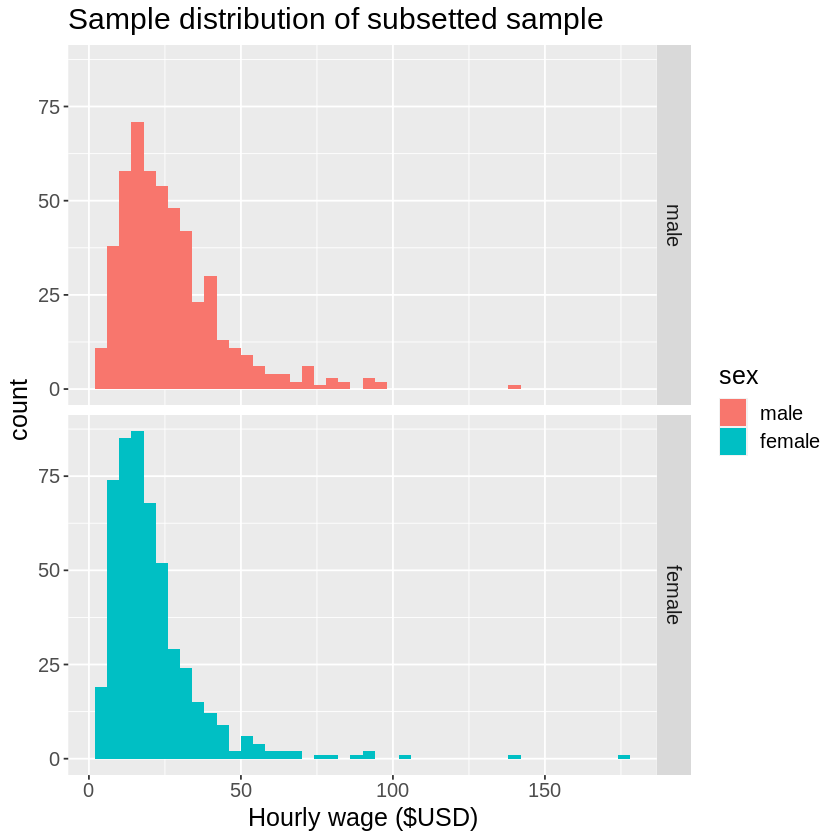

In [11]:
samp_dist_plot <- 
    sample %>% 
    ggplot() + 
    geom_histogram(aes(x = hrwage, fill = sex), binwidth = 4) +
    facet_grid(vars(sex)) + 
    theme(text = element_text(size = 15)) +
    ggtitle("Sample distribution of subsetted sample") + 
    xlab("Hourly wage ($USD)")

samp_dist_plot
print("Figure 3.2")

We visualized the distribution of the sample taken from the original dataset. As you can observe, the shape of the distribution is similar to our original sample in the previous section with a right-skewed distribution and lower peak for women compared to that of men. We can also see that male data is more rightly skewed compared to the female data, just like our original dataset.
Now that we know our sample is representative of the whole dataset, let's perform the hypthothesis test using asymptotic method.

In [12]:
t_test <-  t.test(sample %>% filter(sex == "male") %>% pull(hrwage),
                  sample %>% filter(sex == "female") %>% pull(hrwage),
                  alternative = "greater") %>%
    tidy()
  
t_test
print("Table 3.3 - Results of two-sample t-test")

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.696473,26.86871,21.17223,5.358384,5.218281e-08,994.1389,3.946206,Inf,Welch Two Sample t-test,greater


[1] "Table 3.3 - Results of two-sample t-test"


We perform a two-sample t-test using the built-in `t.test` function with the alternative hypothesis:

$\mu_{\text{male}} > \mu_{\text{female}}$

We used the t-test here as the sample satisfies the assumptions of the Central Limit Theorem. It is randomly drawn and independent of each other; the estimator is indeed a random sum of components; although our distribution isn't Gaussian, we can rely on the fact that our sample size is quite large. We can see that the p-value is very small, 5.2e-08, which is smaller than the significance level of 0.05. Hence, this suggests that the evidence against the null hypothesis is strong enough to reject it! We have now come to conclusion to reject the null hypothesis: male workers and female workers get paid approximately the same hourly wage.

In [13]:
sample_summary <- 
    sample %>%
    group_by(sex) %>%
    summarise(sample_mean = mean(hrwage),
             sample_std_error = sd(hrwage)/sqrt(n()))
sample_summary
print("Table 3.4 - Sample mean and standard error of the two groups")

sex,sample_mean,sample_std_error
<fct>,<dbl>,<dbl>
male,26.86871,0.7747917
female,21.17223,0.7279213


[1] "Table 3.4 - Sample mean and standard error of the two groups"


We just calculated the mean and standard error of the 'hrwage' for different 'sex' from the'sample' data frame.

We will now use these point estimates to compute the confidence interval for the difference in means of hourly wage between men and women.

In [14]:
ci = 0.95

male_mean <- sample_summary$sample_mean[1]
male_var <- sample_summary$sample_std_error[1]^2
female_mean <- sample_summary$sample_mean[2]
female_var <- sample_summary$sample_std_error[2]^2

asymptotic_ci <- 
    tibble(lower_ci = (male_mean - female_mean - qnorm(1- (1-ci)/2) * sqrt(female_var + male_var)),
           upper_ci = (male_mean - female_mean + qnorm(1- (1-ci)/2) * sqrt(female_var + male_var)))

head(asymptotic_ci)
print("Table 3.5 - 95% confidence interval for difference in mean wages (Asymptotic method)")

lower_ci,upper_ci
<dbl>,<dbl>
3.612845,7.780102


[1] "Table 3.5 - 95% confidence interval for difference in mean wages (Asymptotic method)"


We calculated a confidence interval at a 95% confidence level for the difference between the means of men and women using the Central Limit Theorem. 

We are 95% confident that the true difference in hourly wage between men and women is between (3.61, 7.78) USD. 

Note that the confidence interval does not contain 0 which is consistent with our conclusion to reject the null hypothesis.

## Hypothesis Testing - Bootstrapping Method

In this section, we will perform hypothesis test on the subsetted sample from the previous section but using the bootstrapping method.

In [15]:
set.seed(2370)
diff_in_means <- sample |>
    specify(formula = hrwage ~ sex) |>
    generate(reps = 10000, type = "bootstrap") |>
    calculate(stat = "diff in means", order = c("male", "female"))

#Calculating confidence interval for the bootstrap sampling distribution
bootstrap_ci <- diff_in_means |> 
  get_confidence_interval(level = 0.95, type = "percentile")
bootstrap_ci
print("Table 4.1 - 95% confidence interval for difference in mean wages (Bootstrapping method)")

lower_ci,upper_ci
<dbl>,<dbl>
3.586344,7.759319


[1] "Table 4.1 - 95% confidence interval for difference in mean wages (Bootstrapping method)"


[1] "Figure 4.2 - Bootstrap distributuion of difference in mean hourly wage between men and women"


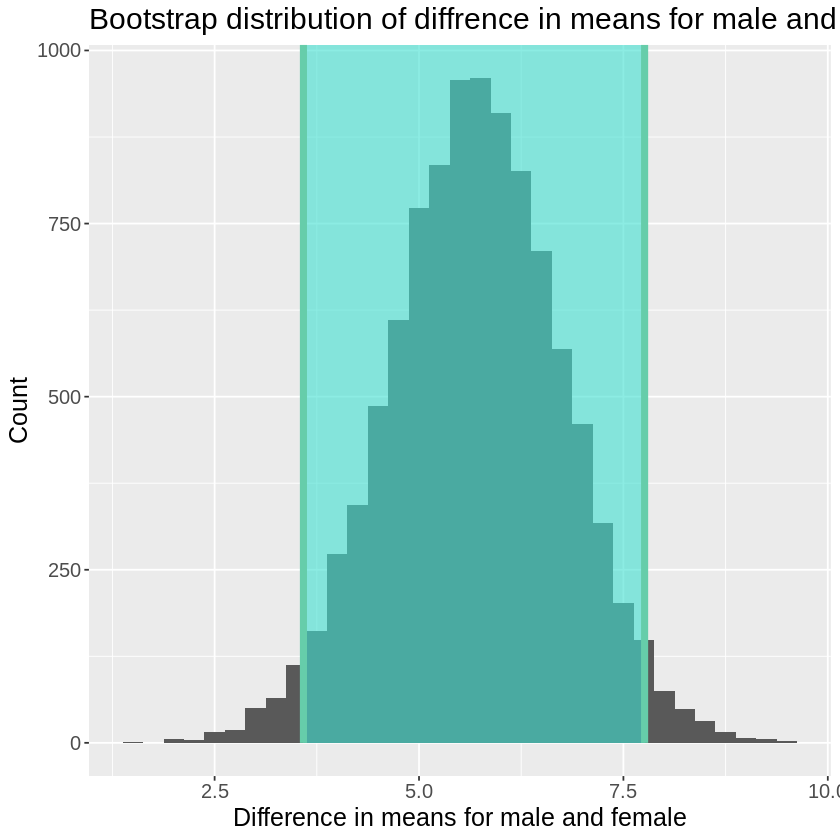

In [19]:
#Visualizing the bootstrap distribution along with the confidence interval
bootstrap_dist <- diff_in_means |>
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 0.25) +
    labs(x = "Difference in means for male and female", y = "Count") +
    ggtitle("Bootstrap distribution of diffrence in means for male and female") +
    theme(text = element_text(size = 15)) +
    shade_confidence_interval(endpoints = bootstrap_ci)

bootstrap_dist
print("Figure 4.2 - Bootstrap distributuion of difference in mean hourly wage between men and women")

We have now generated a histogram plot using ggplot, depicting the bootstrap distribution of the difference in means between male and female groups, with shaded confidence intervals. We can see that our bootstrappd confidence interval is very similar to the confidence interval produced using the asymptotic method. This is to be expected as our sample size is quite large. Similar to the confidence interval produced in the previous section, the confidence interval does not cover 0. This suggests we might have enough evidence to reject the null hypothesis that men and women get paid approximately the same hourly wage. We'll calculate the p-value using the bootstrapping method to confirm our suspicion.

In [18]:
set.seed(8529)
#creating a null distirbution 
null_diff_means <- sample |>
    specify(formula = hrwage ~ sex) |>
    hypothesize(null = "independence") |>
    generate(reps = 10000, type = "permute") |>
    calculate(stat = "diff in means", order = c("male", "female"))

#Computing an observed statistic
obs_diff_means <- sample %>% 
  specify(formula = hrwage ~ sex) %>% 
  calculate(stat = "diff in means", order = c("male", "female"))
obs_diff_means
print("Table 4.3 - Observed test statistic")

stat
<dbl>
5.696473


[1] "Table 4.3 - Observed test statistic"


We have created a null distribution by shuffling gender labels within the 'hrwage' column and then computed differences in means between male and female categories. This process is repeated 10,000 times for statistical analysis. Then we calculated the observed test statistic in our subsetted sample which turned out to be 5.6965.

We will now compute p-value by calculating how unusual it is to get the observed test static under null hypothesis.

In [120]:
#computing p-value
options(digits = 5)

p_value <- null_diff_means %>% 
  get_p_value(obs_stat = obs_diff_means, direction = "right")
p_value
print("Table 4.4 - p-value using bootstrapping method")

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


[1] "Table 4.4 - p-value using bootstrapping method"


The p-value we get is 0. This seem to suggest an absolute evidence we can use against the null hypothesis. However it is important to note that the p-value of 0 often indicates a case where the value is exteremly close to zero that the package decides to round it down. To accomodate this factor, we take the next smallest possible p-value for our null distributions of 10000 samples which is 1/10000 = 1e-05. This is still much smaller than the 0.05 significance level. Therefore, we have sufficient evidence to reject the null hypothesis!. This confirms our prior suspicion. The plot below shows the null distribution and shades the p-value of the observed statistic.

[1] "Figure 4.5 - Null distribution and area of p-value"


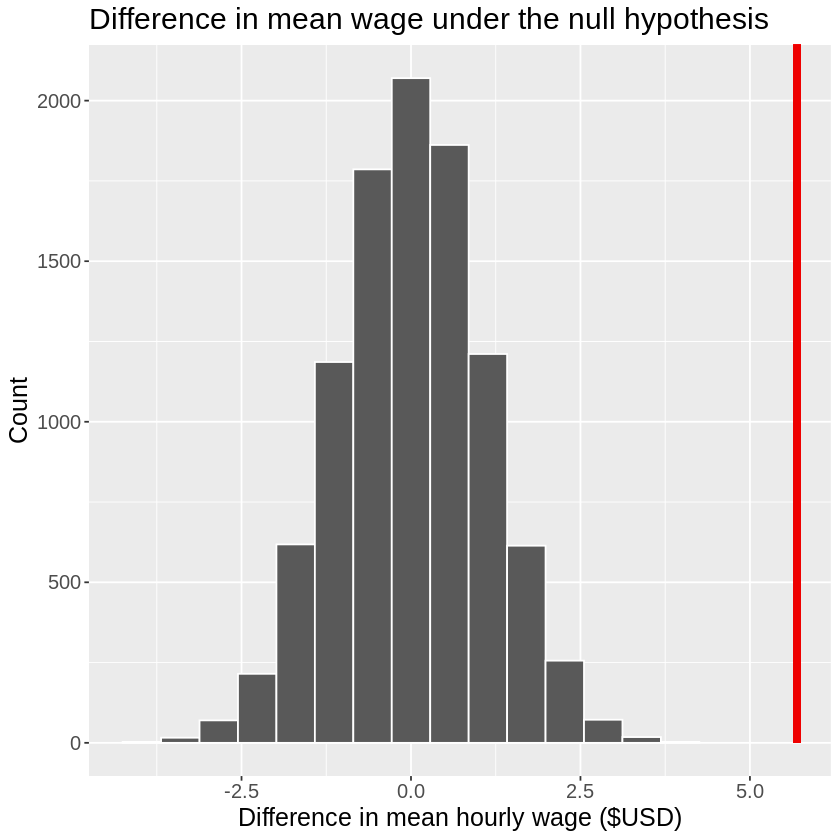

In [122]:
null_distribution <- visualize(null_diff_means) +
    labs(title = "Difference in mean wage under the null hypothesis",
             x = "Difference in mean hourly wage ($USD)",
             y = "Count") +
        theme(text = element_text(size = 15)) +
    shade_p_value(obs_stat = obs_diff_means, direction = "right")
null_distribution
print("Figure 4.5 - Null distribution and area of p-value")

## Comparision of the two methods

For this analysis, we feel that both asymptotic and bootstrapping methods are appropriate. Bootstrapping would work under most circumstances and perform really well if the sample distribution follow the population distribution closely. The asymptotic method would work as stated in the hypothesis testing section. Both methods produce very similar confidence intervals (see *Table 3.3* and *4.1*) and both give very small p-value which could be explained by the large sample size. The two methods therefore corroborate each other to the conclusion that there's suffiencient evidence that, on average, male workers tend to have higher hourly wage compared to their female counterparts.

# Discussion

**Our Findings:**

We have sufficient evidence to support that, on average, female workers earn less hourly wages than their male counterparts. Additionally, we may anticipate uncovering variations in wage gaps across different racial groups, providing deeper insights into intersectional inequalities.

However, it is not clear whether our result truly reflects if the pay gap exists within the real-world scenario. Simply computing the mean of the hourly wages from the pool of all sorts of occupations may not return accurate results. For example, there may be more men working in fields that generally pay higher than other fields; such as STEM fields, capital market jobs, and lawyers.

To further investigate the topic, we may consider variables included in this dataset like race, occupation, job industries, and highest education achieved. Doing so will extend our research into broader issues like the underrepresentation of women in some race/cultures, and the lack of opportunities for women in high-paying fields. We had cleaned and visualized such data in our preliminary analysis as a reference.

**Impact of Findings:**

Highlighting the gender wage gap can serve as a call to action for policymakers, employers, and advocates to address this pressing issue. By quantifying the existence of disparities, our study can contribute to the ongoing efforts toward gender equality in the workforce. 

Furthermore, this project opened up new opportunities for us to expand our curiosity, further investigate the issues of gender inequalities, and gain different perspectives on how we can approach the issues. 

**Future Question:**
- **Wage Gap in Different Industries:** Investigating the wage gap across various industries and occupations could help identify whether the difference in hourly wage comes purely from the gender pay gap or the lack of women in higher-paying fields. 
- **Wage Gap in Different Education Levels:** Investigate whether the wage gap is present among different education levels between two genders.
- **Discriminatory Hiring Practices:** Present two applications where the only difference is sex to a hiring manager and ask how much would they be compensated for if they were hired. Through this, we can conduct a perform paired t-test to see if there's discriminatory hiring practice at play.

# References

1) Deep B. (2021). Gender Pay Gap Dataset. Kaggle. Retrieved from: https://www.kaggle.com/code/deepbdoshi/gender-pay-gap

2) Blau, F. D., & Kahn, L. M. (2017). The Gender Wage Gap: Extent, Trends, and Explanations. Journal of Economic Literature, 55(3), 789–865. http://www.jstor.org/stable/26303306

3) Pew Research Center. (March 1, 2023). Gender Pay Gap Facts. Pew Research Center. Retrieved from https://www.pewresearch.org/short-reads/2023/03/01/gender-pay-gap-facts/